<a href="https://colab.research.google.com/github/Pranali-Patil-1212/Logistic-Regression-Algorithm/blob/main/Car_Purchased_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All CSV_Files/car_data.csv")

In [ ]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
data.columns=data.columns.str.replace(" ", "_")

In [ ]:
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
data.describe()

,User_ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
data.drop(columns="User_ID", axis=1, inplace=True)

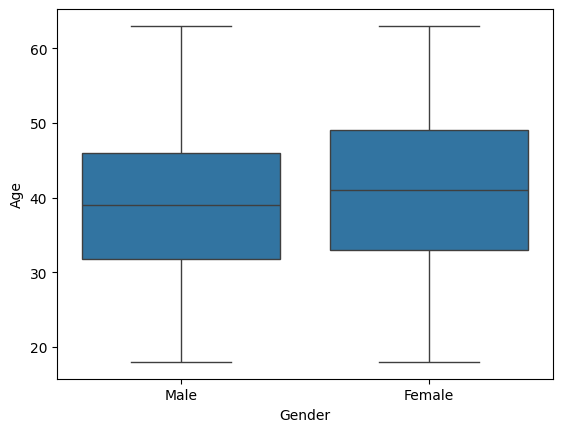

In [ ]:
sns.boxplot(data=data, y="Age", x="Gender")
plt.show()

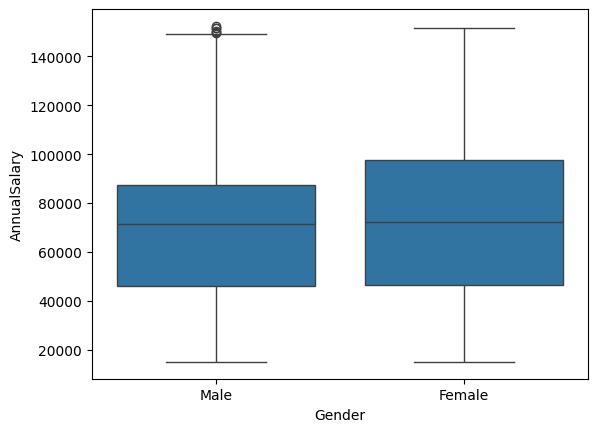

In [ ]:
sns.boxplot(x="Gender", y="AnnualSalary", data=data)
plt.show()

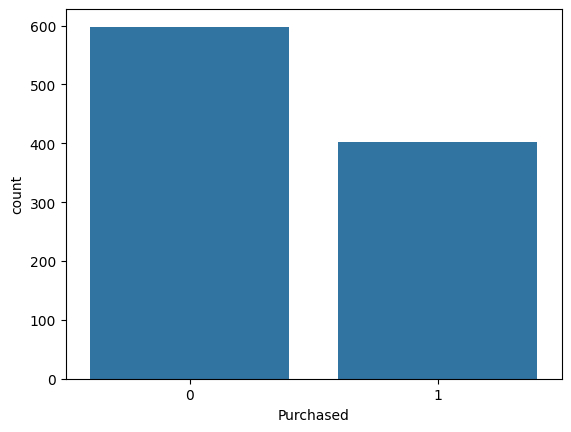

In [ ]:
sns.countplot(x="Purchased", data=data)
plt.show()

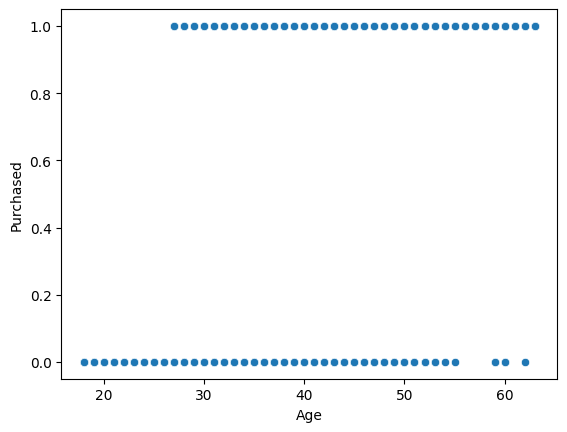

In [ ]:

sns.scatterplot(data=data, x="Age", y="Purchased")
plt.show()

In [ ]:
#data.drop(columns="U")

In [ ]:
x=data.iloc[:, :-1]
y=data["Purchased"]
y.head()

,Purchased
0,0
1,0
2,0
3,1
4,0


In [ ]:
x = pd.get_dummies(x, columns= ['Gender'], drop_first= True)
x.head()

,Age,AnnualSalary,Gender_Male
0,35,20000,True
1,40,43500,True
2,49,74000,True
3,40,107500,True
4,25,79000,True


In [ ]:

x.head()

,Age,AnnualSalary,Gender_Male
0,35,20000,True
1,40,43500,True
2,49,74000,True
3,40,107500,True
4,25,79000,True


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.score(x_test, y_test)*100

79.5

In [ ]:
lr.predict([[35,20000,True]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
lr.predict([[40,107500,True]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

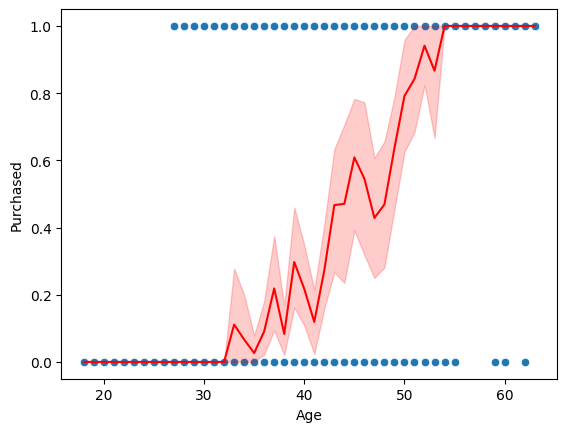

In [ ]:
sns.scatterplot(x="Age", y="Purchased", data=data)
sns.lineplot(x="Age", y=lr.predict(x), data=data, color="red")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("Train Accuracy:", r2_score(lr.predict(x_train), y_train))
print("Test Accuracy:", r2_score(lr.predict(x_test), y_test))

Train Accuracy: 0.22978354978354976
Test Accuracy: 0.06552706552706555
